In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score,precision_score,recall_score, roc_curve, classification_report,precision_recall_curve
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Binarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings(action="ignore")

np.random.seed(121)
tf.random.set_seed(121)

In [16]:
from google.colab import drive
mp = '/gdrive'
drive.mount(mp, force_remount=True)

Mounted at /gdrive


In [17]:
df = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/data/diabetes.csv")

In [18]:
#----------------------DataFrame 확인
print(df.shape)  #(768, 9)
print(df.info()) #결측 X, Object X
print(df.head())
print(df["Outcome"].value_counts())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...               

In [19]:
# 1. 이상치 발견(0값)
# 2. 나이(구간화)
# 3. 정규화(스케일링/아웃라이어)
# 4. 타켓 : Outcome(0/1)

In [20]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
print(X.shape, y.shape)

(768, 8) (768,)


In [21]:
#--- 분석 : 결측 X     : isnull()  dropna()  fillna()
#--- 분석 : Object X  : oh.Encoding():010  pd.getDummy():결측처리+인코딩(글자->수치)
#--- 상관분석
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True,  fmt=".2g", cmap="Blues")
# plt.show()

In [22]:
def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],    label='acc')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'val_acc')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'val_loss')
    plt.legend()
    plt.show()

In [23]:
def GET_MY_SCORE(y_test, pred, str=None) :
    print("------{}-------".format(str))
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    # print("정확도:" , acc , "f1:", f1)
    print("정확도{:.4f}  F1 {:.4f}=(정밀도{:.4f}  재현률{:.4f}) rocauc{:.4f}".format(acc, f1, precision, recall, auc))
    cf_matrix = confusion_matrix(y_test, pred)
    print(cf_matrix)
    # [[90 10]
    #  [18 36]]
    # 10 : 정밀도(예측P,실제P)  --> (FP):예측이 당뇨(P)인데 실제론 정상(N)
    # 18 : 재현율(실제P,예측P)  --> (FN):실제론 당뇨(P)인데 예측이 정상(N)

In [24]:
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

print(X_train.shape)  # (614,8)  (768,8)

(614, 8)


In [25]:
rf_model  = Sequential()
rf_model.add(Dense(32, input_dim=8, activation="relu"))
rf_model.add(Dense(16, activation="relu"))
rf_model.add(Dense(8, activation="relu"))
rf_model.add(Dense(1, activation="sigmoid"))
print(rf_model.summary())
rf_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 10.1252 - accuracy: 0.4374 - val_loss: 2.0052 - val_accuracy: 0.4870
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 2.0552 - accuracy: 0.3713 - val_loss: 1.2995 - val_accuracy: 0.3442
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 1.2592 - accuracy: 0.3614 - val_loss: 0.9632 - val_accuracy: 0.3766
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9439 - accuracy: 0.4354 - val_loss: 0.8505 - val_accuracy: 0.4156
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7943 - accuracy: 0.4677 - val_loss: 0.7992 - val_accuracy: 0.4610
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8235 - accuracy: 0.5329 - val_loss: 0.7486 - val_accuracy: 0.5390
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7926 - accuracy: 0.6156 - val_loss: 0.7378 - val_accuracy: 0.6104
Epoch 8/100

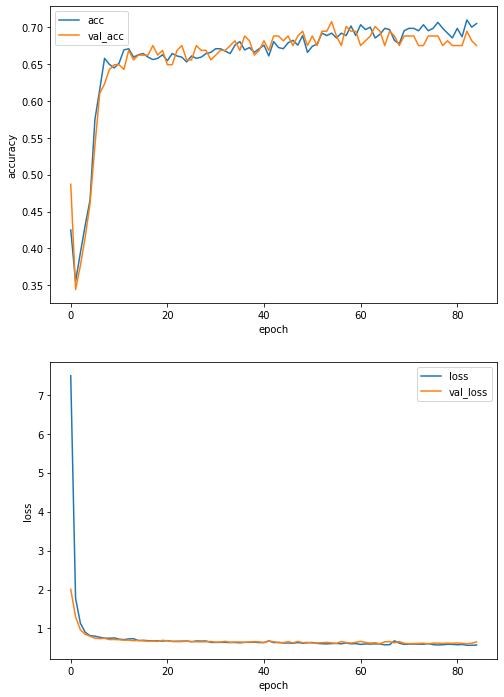

In [26]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = rf_model.fit(X_train, y_train,
                       validation_data=(X_test,y_test),
                       epochs=100,
                       callbacks=[early_stop])

CHART_PLOT_HISTORY(history)

In [27]:
test_loss, test_acc = rf_model.evaluate(X_test, y_test, verbose=0)
print('테스트 정확도:', test_acc)

# print(y_test.shape)  #(154,)
#
pred = rf_model.predict(X_test) #.flatten()

print(y_test.shape, pred.shape)  #(154,)(154,)
print(y_test[:5], pred[:5])  #pd.Series[0 1 0],  np.array[0 0 0 0 0]

테스트 정확도: 0.6753246784210205
(154,) (154, 1)
601    0
224    0
766    1
17     1
369    1
Name: Outcome, dtype: int64 [[0.39381337]
 [0.25247145]
 [0.35347882]
 [0.35347882]
 [0.47699675]]


In [28]:
#머신러닝에서는 0, 1로 나와서 괜찮은데, 딥러닝 같은 경우 cross entropy 때문에 확률로 나온다 -> 0/1로 구분해줘야 한다. => Binarizer 이용

bn = Binarizer(threshold=0.5)  # threadshold보다크면 1 아니면 0
bn_pred = bn.fit_transform(pred.reshape(-1, 1))  # 세로줄 메트릭스
# print(bn_pred[:5], bn_pred.shape)  #(154,1)  --> pred.shape가 (154,)이므로 계산이 안 됨
# [[0.]
#  [0.]
#  [0.]]

bn_pred = bn_pred.flatten() #flatten() --> 가로로 길게 그려줌 = np형식(154,)으로 나옴
# print(bn_pred[:5], bn_pred.shape)
GET_MY_SCORE(y_test, bn_pred, "최초점수")

------최초점수-------
정확도0.6753  F1 0.2188=(정밀도0.7000  재현률0.1296) rocauc0.5498
[[97  3]
 [47  7]]


In [29]:
#=====================================================
# Glucose         5 0.65
# BloodPressure   35 4.56
# SkinThickness   227 29.56
# Insulin         374 48.7
# BMI             11 1.43

In [30]:
zero_column = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
print(X[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].describe())
zero_column_mean = X[zero_column].median().round(1)
X[zero_column] = X[zero_column].replace(0, zero_column_mean)

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   120.894531      69.105469      20.536458   79.799479   31.992578
std     31.972618      19.355807      15.952218  115.244002    7.884160
min      0.000000       0.000000       0.000000    0.000000    0.000000
25%     99.000000      62.000000       0.000000    0.000000   27.300000
50%    117.000000      72.000000      23.000000   30.500000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [31]:
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.6792


In [32]:
bn = Binarizer(threshold=0.5)  # threadshold보다크면 1 아니면 0
bn_pred = bn.fit_transform(pred.reshape(-1, 1)).flatten()

GET_MY_SCORE(y_test, bn_pred, "아웃라이어/특이값(0) 처리 후 점수")

------아웃라이어/특이값(0) 처리 후 점수-------
정확도0.6688  F1 0.1639=(정밀도0.7143  재현률0.0926) rocauc0.5363
[[98  2]
 [49  5]]
